# Assignment 2
## Naive Bayes Classifier

## Student Details (1 Point)

First Student Name and ID: Akhil Ade 1002074926

Second Student Name and ID: Sai Subhash Yalamanda 1002031729

Third Student Name and ID: Naga Sri Sampath Inagalla 1002070731



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

# Remeber to cite any external sources here

# Naive Bayes-

## Programming Assignment Details-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report- 
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)

## Grading-
1. (30 pts) Loading and preprocessing of the data.
2. (30 pts) Creation of correct model(NB), with decent metrics, plotting confusion matrix.
3. (30 pts) Explaining the approach, also explain the(if any) preprocessor which you used.
4. (7 pts) Neatly presented code, with comments, correctly named files, complete report section, and followed the UTA code of conduct.

## Programming Assignment Submission Instructions (2 Points)
Each file should be submitted separately, do not compress them, only one student submits.

Format of file naming:

NB-
'yourLastName_Last4digitsofyourID_NB.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)

## What to submit-
1. Jupyter files(.ipynb)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#imports for feature extraction
import string
import re
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter


In [2]:
# Reading the dataset
df = pd.read_csv("dataset_NB.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
df.info()#display summary of the dataset
df['email'][0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


' date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER NUMBER 

In [4]:
#intalling libraries
pip install nltk
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

# Preprocessing

In [5]:
df = df.drop_duplicates(ignore_index=True)#removing duplicates
df = df.dropna()#removing null vales
stop_words= set(stopwords.words('english'))#stopwords from nltk
stop_words=[ x.lower() for x in stop_words ]# converting stop words to lower case
print(stop_words)



['weren', 'all', "didn't", "hasn't", 'when', 'ourselves', "she's", 'ours', 'yourselves', "hadn't", 'down', 'is', 'did', 'up', 'not', 're', 'just', 'will', 'whom', 'where', 'before', 'was', 'to', 'we', 'been', 'of', 'being', 'further', 'out', 'don', 'above', "you're", 'a', 'now', 'doing', 'itself', 'there', 'it', 'they', 'our', 'these', 'o', 'very', 'd', 'll', 'about', 'an', 'yourself', 'does', 'how', 'having', 'in', 'under', 'and', 'no', 'few', 'wouldn', 'why', 'them', "needn't", "you'll", 'mustn', 'shan', 'with', 'i', 'here', "won't", 'into', "mustn't", 'between', 'such', 'haven', 'you', 'too', 't', 'shouldn', 'at', 'won', 'once', 'are', 'own', 'hadn', "that'll", 'wasn', 'were', 'needn', 'as', 'again', 'those', "mightn't", 'ma', 'should', 'couldn', 'some', "shan't", 'if', 'me', 'yours', "doesn't", 'hers', "you'd", 'm', 'him', "weren't", 'nor', 'doesn', 'after', 'more', 'which', 'below', 'through', 'his', 'her', "you've", 'other', 'can', 'himself', 'so', 'until', "wasn't", 'from', "wou

In [6]:
stop_words += ['date','number','dated','com','message','like','without','inbox','comes','obviously','using','url','since','get','ago','must','le','make','also','well','much','many','take','give','used','made','come','another','thanks']#adding unwanted words to stopwords 
def extract_data(data):#preprocessing
    punctuation="["+re.sub("\.","",string.punctuation)+"]"
    data = re.sub('\n',' ',str(data))
    data=re.sub(' +',' ', data)# removing extra spaces
    data=re.sub(punctuation,"",data)#removing punctuations
    data=data.lower()# converting data to lower case
    data=data.split(" ")# spliting the data as tokens 
    data=[x for x in data if x.isalpha] # checking the word is string/not
    lemma=WordNetLemmatizer()
    data= [lemma.lemmatize(word) for word in data if len(word)>3]# applying lemmatization
    data=[ x for x in data if x not in stop_words] # removing all stop words from the extracted data
    bigrams=ngrams(data,2)# Applying bigrams
    freqofbigrams=Counter(bigrams)
    s=freqofbigrams.most_common(2)# considering most common bigrams
    for i in s:# adding bigrams to the bucket
        m=i[0]
        if m[0]!=m[1]:
            g=m[0]+' '+m[1]
            a=[g]*i[1]
            data.extend(a)
    for i in data: # checking the word is string/not
        if i.isalpha():
            continue
        else:
            data.remove(i)
    
    return data
df['email']=df['email'].apply(extract_data)# applying the extract _data function to the dataset
df['email'][0]





    

['chris',
 'garrigues',
 'numberfanumberd',
 'deepeddy',
 'tmda',
 'deepeddy',
 'vircio',
 'reproduce',
 'error',
 'repeatable',
 'every',
 'time',
 'fail',
 'debug',
 'pick',
 'happening',
 'pickit',
 'exec',
 'pick',
 'list',
 'lbrace',
 'lbrace',
 'subject',
 'rbrace',
 'rbrace',
 'sequence',
 'mercury',
 'exec',
 'pick',
 'list',
 'lbrace',
 'lbrace',
 'subject',
 'rbrace',
 'rbrace',
 'sequence',
 'mercury',
 'ftocpickmsgs',
 'marking',
 'hit',
 'tkerror',
 'syntax',
 'error',
 'expression',
 'note',
 'pick',
 'command',
 'hand',
 'delta',
 'pick',
 'list',
 'lbrace',
 'lbrace',
 'subject',
 'rbrace',
 'rbrace',
 'sequence',
 'mercury',
 'version',
 'delta',
 'pick',
 'version',
 'pick',
 'compiled',
 'relevant',
 'part',
 'mhprofile',
 'delta',
 'mhparam',
 'pick',
 'list',
 'pick',
 'command',
 'work',
 'sequence',
 'actually',
 'explicit',
 'command',
 'line',
 'search',
 'popup',
 'mhprofile',
 'created',
 'still',
 'version',
 'code',
 'form',
 'able',
 'reach',
 'repository'

In [7]:
features = Counter()
for words in df['email']:# counting the words in the dataset
    for i in words:
        features[i] += 1      
print(features)

Counter({'list': 2279, 'time': 1490, 'people': 1303, 'would': 1240, 'email': 1235, 'mail': 1153, 'free': 1081, 'user': 979, 'mailing': 934, 'wrote': 916, 'year': 901, 'work': 893, 'state': 824, 'world': 807, 'said': 792, 'file': 789, 'group': 759, 'spamassassin': 754, 'think': 723, 'want': 713, 'first': 711, 'could': 707, 'spam': 706, 'know': 692, 'right': 690, 'hyperlink': 679, 'company': 676, 'money': 675, 'information': 675, 'need': 669, 'even': 661, 'line': 631, 'problem': 625, 'business': 615, 'system': 596, 'exmh': 593, 'name': 586, 'thing': 581, 'please': 576, 'address': 562, 'linux': 554, 'good': 549, 'doe': 538, 'send': 523, 'report': 519, 'home': 519, 'government': 508, 'service': 506, 'change': 493, 'order': 493, 'subject': 479, 'find': 476, 'package': 471, 'help': 470, 'still': 467, 'internet': 460, 'program': 452, 'razor': 452, 'data': 443, 'look': 440, 'something': 434, 'best': 434, 'check': 417, 'site': 414, 'really': 411, 'link': 409, 'software': 405, 'talk': 404, 'ever

In [8]:
features={k: v for k, v in sorted(features.items(), key=lambda item: item[1], reverse=True)}# coverting the type dict
features={key: val for key,val in features.items() if (val > 150  and val < 1000) or (" " in key and val > 10)  }#considering the features which has the counter value of above 150 and below 1000
features=list(features.keys())# features for the new dataset
print(features)


['user', 'mailing', 'wrote', 'year', 'work', 'state', 'world', 'said', 'file', 'group', 'spamassassin', 'think', 'want', 'first', 'could', 'spam', 'know', 'right', 'hyperlink', 'company', 'money', 'information', 'need', 'even', 'line', 'problem', 'business', 'system', 'exmh', 'name', 'thing', 'please', 'address', 'linux', 'good', 'doe', 'send', 'report', 'home', 'government', 'service', 'change', 'order', 'subject', 'find', 'package', 'help', 'still', 'internet', 'program', 'razor', 'data', 'look', 'something', 'best', 'check', 'site', 'really', 'link', 'software', 'talk', 'every', 'click', 'phone', 'country', 'back', 'case', 'last', 'life', 'server', 'united', 'long', 'network', 'sure', 'today', 'technology', 'unsubscribe', 'better', 'million', 'computer', 'sent', 'next', 'found', 'point', 'real', 'fork', 'security', 'month', 'part', 'american', 'perl', 'code', 'week', 'going', 'idea', 'might', 'version', 'never', 'anyone', 'numbertnumber', 'offer', 'error', 'different', 'within', 'ma

In [9]:
def freq(lis):# function to count the repeated words in a columns and giving the count as a datapoint
    a=dict()
    for i in features:
        if(i in lis):
            c=lis.count(i)
            a[i]=c
        else:
            a[i]=0
    return a
df['email']=df['email'].apply(freq)# applying the frequency function
df['email'][0]

{'user': 0,
 'mailing': 1,
 'wrote': 0,
 'year': 0,
 'work': 1,
 'state': 0,
 'world': 0,
 'said': 0,
 'file': 0,
 'group': 0,
 'spamassassin': 0,
 'think': 1,
 'want': 0,
 'first': 0,
 'could': 0,
 'spam': 0,
 'know': 0,
 'right': 0,
 'hyperlink': 0,
 'company': 0,
 'money': 0,
 'information': 0,
 'need': 0,
 'even': 0,
 'line': 1,
 'problem': 0,
 'business': 0,
 'system': 0,
 'exmh': 2,
 'name': 0,
 'thing': 0,
 'please': 0,
 'address': 0,
 'linux': 0,
 'good': 0,
 'doe': 0,
 'send': 0,
 'report': 0,
 'home': 0,
 'government': 0,
 'service': 0,
 'change': 0,
 'order': 0,
 'subject': 3,
 'find': 0,
 'package': 0,
 'help': 0,
 'still': 1,
 'internet': 0,
 'program': 0,
 'razor': 0,
 'data': 0,
 'look': 0,
 'something': 0,
 'best': 0,
 'check': 0,
 'site': 0,
 'really': 0,
 'link': 0,
 'software': 0,
 'talk': 0,
 'every': 1,
 'click': 0,
 'phone': 0,
 'country': 0,
 'back': 0,
 'case': 0,
 'last': 0,
 'life': 0,
 'server': 0,
 'united': 0,
 'long': 0,
 'network': 0,
 'sure': 0,
 'today'

In [10]:
features.append('label')# adding label feature to the dataset


In [11]:
final=pd.DataFrame(columns=features)

In [12]:
c=0
for i,j in df.iterrows():#adding data to the dataframe with the frequencies
    val=list(j['email'].values())
    if(sum(val)>0):
        val.append(j['label'])
        final.loc[c]=val
        c+=1
final#displaying the data

,user,mailing,wrote,year,work,state,world,said,file,group,...,spamc line,email address,african american,bulk email,zowie wowie,shangrila zowie,saou wrote,white house,line configure,label
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,3,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2852,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2854,2,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
final.to_csv('Extracted_dataset_NB.csv',index=False)#writing as a csv file

In [14]:
# train_test_split
data = pd.read_csv('Extracted_dataset_NB.csv')# reading the extracted data
X=data.drop("label",axis='columns')
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


Accuracy: 0.8881118881118881


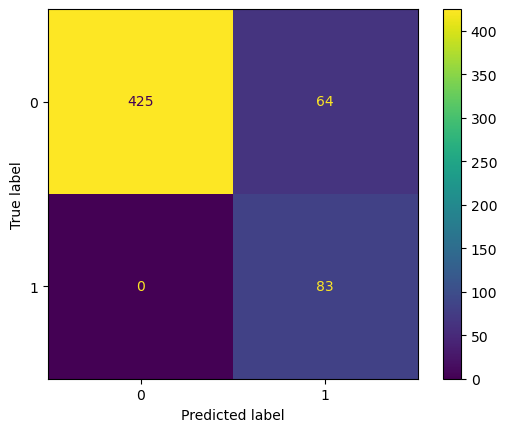

##   Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right.Every True value is accurately predicting. Yet, over 60% of the false vales are inaccurately predicting.


In [15]:
# applying GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
# Predict the labels of the testing set
y_pred=nb.predict(X_test)

# Calculate the accuracy of the model
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

# Plot the confusion matrix
matrix=confusion_matrix(y_test,y_pred)
display_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix)
display_matrix.plot()
plt.show()
print("##   Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right.Every False value is accurately predicting. Yet, Almost 2% of the True vales are inaccurately predicting.")



In [16]:
# Calculate metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       489
           1       0.56      1.00      0.72        83

    accuracy                           0.89       572
   macro avg       0.78      0.93      0.83       572
weighted avg       0.94      0.89      0.90       572



Accuracy: 0.9702797202797203


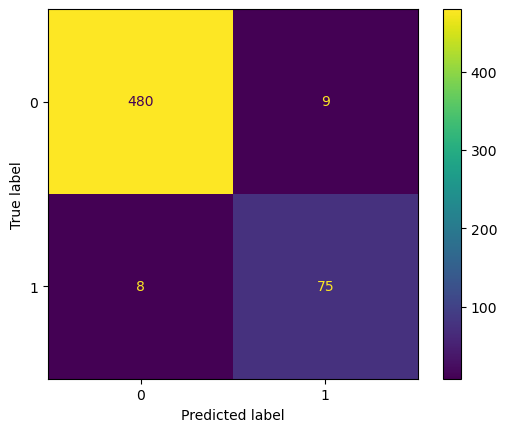

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       489
           1       0.89      0.90      0.90        83

    accuracy                           0.97       572
   macro avg       0.94      0.94      0.94       572
weighted avg       0.97      0.97      0.97       572

Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right


In [17]:
#using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train, y_train)
# Predict the labels of the testing set
y_pred=nb.predict(X_test)

# Calculate the accuracy of the model
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

# Plot the confusion matrix
matrix=confusion_matrix(y_test,y_pred)
display_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix)
display_matrix.plot()
plt.show()
print(classification_report(y_test,y_pred))
print("Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right")


Accuracy: 0.9335664335664335


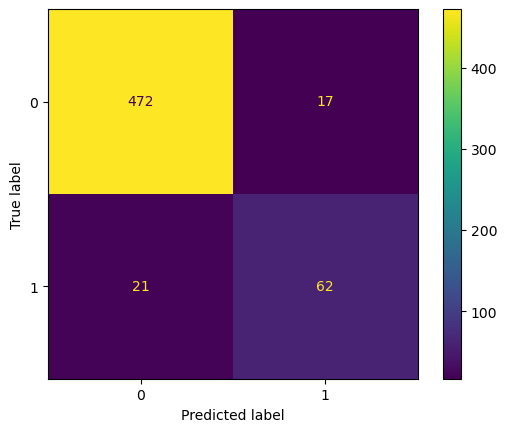

Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       489
           1       0.78      0.75      0.77        83

    accuracy                           0.93       572
   macro avg       0.87      0.86      0.86       572
weighted avg       0.93      0.93      0.93       572



In [18]:
#using BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train, y_train)
# Predict the labels of the testing set
y_pred=nb.predict(X_test)

# Calculate the accuracy of the model
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

# Plot the confusion matrix
matrix=confusion_matrix(y_test,y_pred)
display_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix)
display_matrix.plot()
plt.show()
print("Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right")

print(classification_report(y_test,y_pred))

## Conclusions

The accuracy for the Figure 1 which is the Guassian Naive Bayes model is around 89% which is significantly lower than the accuracy achieved for the multinomial Naive Bayes model which is 97% and the accuracy achieved for the bernoulli Naive Bayes Model which is approximately 93%. The false negative results in the confusion matrix shows the most significant improvement.

